In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
train_dir = 'C:/Users/DELL/Desktop/train'
test_dir  = 'C:/Users/DELL/Desktop/test'

In [4]:
categories = ["yse"," no "]

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
image_size = (224, 224)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2398 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


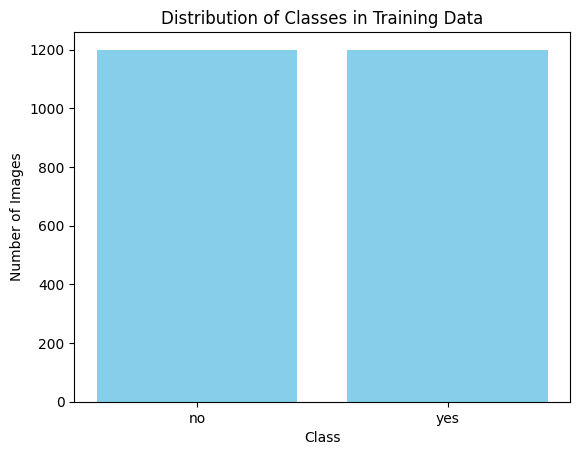

In [7]:
labels, counts = np.unique(train_generator.classes ,return_counts=True)
class_names = list(train_generator.class_indices.keys())

plt.bar(class_names, counts, color='skyblue')
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

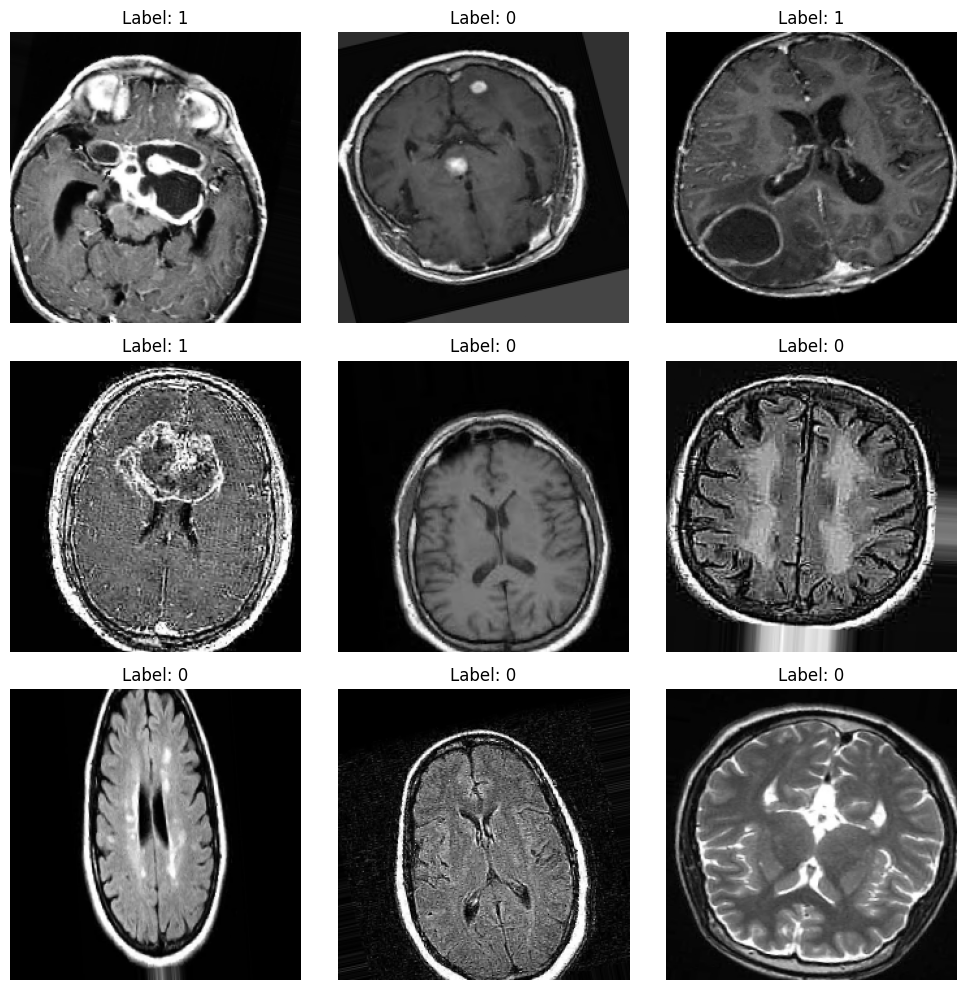

In [8]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"Label: {int(y_batch[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

implmentation of CNN

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.6),

    Dense(1, activation='sigmoid')  
])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
epochs = 20

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6247 - loss: 0.8072 - val_accuracy: 0.7517 - val_loss: 0.5449
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7404 - loss: 0.5266 - val_accuracy: 0.7583 - val_loss: 0.5213
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.7801 - loss: 0.4919 - val_accuracy: 0.7417 - val_loss: 0.5804
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.7806 - loss: 0.4665 - val_accuracy: 0.7800 - val_loss: 0.4490
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8143 - loss: 0.4349 - val_accuracy: 0.7450 - val_loss: 0.5074
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8126 - loss: 0.4173 - val_accuracy: 0.7783 - val_loss: 0.4944
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8146 - loss: 0.4214 - val_accuracy: 0.7367 - val_loss: 0.5520
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8282 - loss: 0.3941 - val_accuracy: 0.7683 - val_

In [20]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - accuracy: 0.7807 - loss: 0.7125
Test Accuracy: 0.85


In [21]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['tumor', 'no_tumor']))


[[218  82]
 [  9 291]]
              precision    recall  f1-score   support

       tumor       0.96      0.73      0.83       300
    no_tumor       0.78      0.97      0.86       300

    accuracy                           0.85       600
   macro avg       0.87      0.85      0.85       600
weighted avg       0.87      0.85      0.85       600



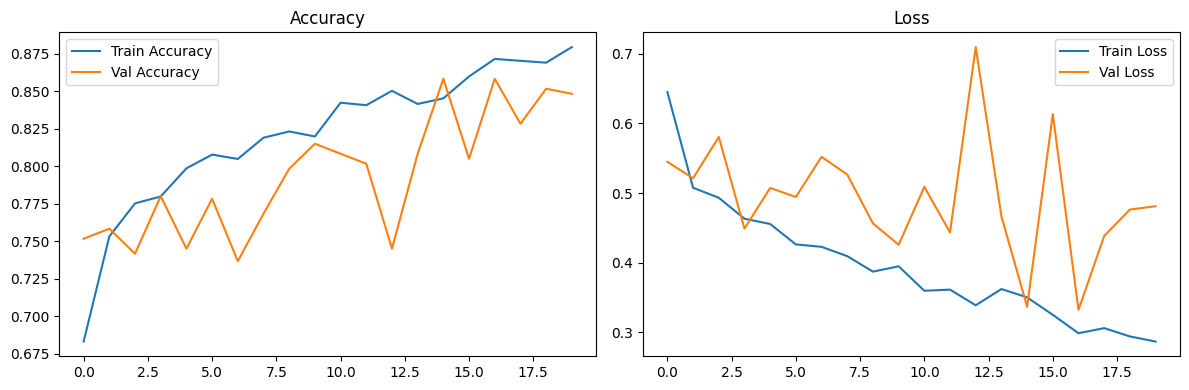

In [25]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

object detection model

In [1]:
import os
import json
from PIL import Image
from tqdm import tqdm

In [2]:
BASE_DIR = r"C:/Users/DELL/Desktop/New folder"
SPLITS = ["train", "val", "test"]

In [3]:
for split in SPLITS:
    json_path = os.path.join(BASE_DIR, f"annotations_{split}.json")
    images_path = os.path.join(BASE_DIR, split.upper())
    output_images = os.path.join(BASE_DIR, "yolo_dataset", "images", split)
    output_labels = os.path.join(BASE_DIR, "yolo_dataset", "labels", split)

    os.makedirs(output_images, exist_ok=True)
    os.makedirs(output_labels, exist_ok=True)
    with open(json_path, 'r') as f:
        data = json.load(f)

    for entry in tqdm(data.values(), desc=f"Processing {split}"):
        filename = entry['filename']
        regions = entry['regions']
        image_path = os.path.join(images_path, filename)

        try:
            with Image.open(image_path) as img:
                w, h = img.size
                img.save(os.path.join(output_images, filename))
        except:
            print(f"wrong in image {filename}")
            continue

        label_file_path = os.path.join(output_labels, filename.replace('.jpg', '.txt'))
        with open(label_file_path, 'w') as f:
            for region in regions:
                shape = region['shape_attributes']
                if 'all_points_x' in shape and 'all_points_y' in shape:
                    x_points = shape['all_points_x']
                    y_points = shape['all_points_y']

                    xmin = min(x_points)
                    xmax = max(x_points)
                    ymin = min(y_points)
                    ymax = max(y_points)

                    x_center = ((xmin + xmax) / 2) / w
                    y_center = ((ymin + ymax) / 2) / h
                    bbox_width = (xmax - xmin) / w
                    bbox_height = (ymax - ymin) / h

                    f.write(f"0 {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

print("All data has been successfully converted to YOLO format")  


Processing test: 100%|██████████| 100/100 [00:00<00:00, 143.46it/s]

All data has been successfully converted to YOLO format


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [6]:
train_dir = 'C:/Users/DELL/Desktop/train'
test_dir  = 'C:/Users/DELL/Desktop/test'


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [4]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1919 images belonging to 2 classes.
Found 479 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 600 images belonging to 2 classes.


In [10]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.6)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

In [11]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [15]:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5109 - loss: 0.6966 - val_accuracy: 0.4990 - val_loss: 0.6938 - learning_rate: 1.0000e-04
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.5078 - loss: 0.6988 - val_accuracy: 0.4990 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.5040 - loss: 0.6991 - val_accuracy: 0.4990 - val_loss: 0.6933 - learning_rate: 1.0000e-04
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5035 - loss: 0.6951 - val_accuracy: 0.4990 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.5055 - loss: 0.6973 - val_accuracy: 0.4990 - val_loss: 0.6933 - learning_rate: 1.0000e-04
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.5058 - loss: 0.6956 - val_accuracy: 0.4990 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.4929 

In [16]:
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 594s 9s/step - accuracy: 0.5438 - loss: 0.8393 - val_accuracy: 0.4927 - val_loss: 0.6926 - learning_rate: 1.0000e-05
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 554s 9s/step - accuracy: 0.5655 - loss: 0.7856 - val_accuracy: 0.5219 - val_loss: 0.6924 - learning_rate: 1.0000e-05
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 547s 9s/step - accuracy: 0.6269 - loss: 0.6899 - val_accuracy: 0.4718 - val_loss: 0.6994 - learning_rate: 1.0000e-05
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 549s 9s/step - accuracy: 0.6463 - loss: 0.6552 - val_accuracy: 0.4781 - val_loss: 0.6983 - learning_rate: 1.0000e-05
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 559s 9s/step - accuracy: 0.6777 - loss: 0.6116 - val_accuracy: 0.5261 - val_loss: 0.6895 - learning_rate: 1.0000e-05
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 549s 9s/step - accuracy: 0.7082 - loss: 0.5734 - val_accuracy: 0.5574 - val_loss: 0.6717 - learning_rate: 1.0000e-05
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 548s 9s/step - accuracy: 0.7223 

In [18]:
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3463 - loss: 0.7412
Test Accuracy: 0.58
